In [1]:
# Load Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,  AdaBoostRegressor, BaggingRegressor, StackingRegressor
from sklearn.model_selection import  cross_val_score, KFold,train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [2]:
#Load Training Data
file ='training.csv'
#Set index as date
data_train = pd.read_csv(file,parse_dates=['date'])
data_train.shape
#Process column names
def clean_header(col):
    col = str(col).strip().replace(' ', '_')
    return col

data_train.columns = [clean_header(col) for col in data_train.columns]

In [3]:
# Process dates
data_train['date' + '_year'] = data_train['date'].dt.year
data_train['date' + '_month'] = data_train['date'].dt.month_name()
data_train['date' + '_day'] = data_train['date'].dt.day
data_train['date' + '_dayofweek'] = data_train['date'].dt.day_name()
# Set index by date and sort it
data_train = data_train.sort_values(by='date',ascending=True)
data_train = data_train.set_index("date")
data_train

,image,image_class,bar,baz,xgt,qgg,lux,wsg,yyz,drt,...,boz,fyt,lgh,hrt,juu,target,date_year,date_month,date_day,date_dayofweek
date,,,,,,,,,,,,,,,,,,,,,
2016-03-01,training-img/dog/dog_50.jpg,dog,-0.125676,0,-120.310277,8.081390,6340.483433,0.008793,0.303609,-1320.744709,...,0.173805,0,0,81.894630,83.875081,-59103.644602,2016,March,1,Tuesday
2016-03-02,training-img/person/person_17.jpg,person,1169.009109,1,101.049242,17.777242,7500.665167,0.007769,10.824538,-2183.043399,...,0.500617,0,0,-183.829225,65.615380,106706.793795,2016,March,2,Wednesday
2016-03-04,training-img/cartoon/cartoon_2.jpg,cartoon,0.199092,0,-115.413987,5.627181,5939.876688,0.008778,-5.953482,-22.046246,...,0.245328,1,0,-92.336726,83.590049,-30562.548004,2016,March,4,Friday
2016-03-07,training-img/dog/dog_13.jpg,dog,285.243307,1,-43.599535,13.999779,6356.146715,0.005561,-19.612725,-507.158006,...,0.933765,0,0,-130.920248,33.749667,114078.796723,2016,March,7,Monday
2016-03-07,training-img/dog/dog_27.jpg,dog,-86.461377,0,-74.597906,-9.813760,5376.881188,0.011387,22.311303,-3.580118,...,0.460253,0,0,-385.304179,139.678549,112595.743428,2016,March,7,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-24,training-img/cake/cake_42.jpg,cake,1093.701390,0,222.123616,7.748889,5610.566157,0.011956,-2.737802,-0.663503,...,0.720050,0,0,-155.924891,153.715559,-109733.061184,2019,February,24,Sunday
2019-02-24,training-img/flower/flower_48.jpg,flower,-21.391309,0,19.406944,-0.632102,7495.286229,0.017419,-0.461202,-4.810298,...,0.437862,0,0,-441.424276,319.318688,211935.049671,2019,February,24,Sunday
2019-02-25,training-img/boat/boat_73.jpg,boat,115.656085,0,-280.192885,15.059633,5218.871438,0.012107,17.160476,-1685.581874,...,0.626997,1,0,-72.664875,157.535841,80481.373807,2019,February,25,Monday


In [4]:
#Columns Names
data_train.columns

Index(['image', 'image_class', 'bar', 'baz', 'xgt', 'qgg', 'lux', 'wsg', 'yyz',
       'drt', 'gox', 'foo', 'boz', 'fyt', 'lgh', 'hrt', 'juu', 'target',
       'date_year', 'date_month', 'date_day', 'date_dayofweek'],
      dtype='object')

In [5]:
# Remove image and image class columns
data_train.drop(['image'], axis="columns", inplace=True)
print(f"Dimension df rows, columns: {data_train.shape}")

Dimension df rows, columns: (678, 21)


In [6]:
# Find duplicated entries by date
duplicate_mask_series = data_train.index.duplicated(keep=False)
print(f" Duplicate dates {sum(duplicate_mask_series)}")

 Duplicate dates 322


In [7]:
# Find all occurrences of the duplicate dates
# Similar dates map to different target values thus date will not be considered
data_train[duplicate_mask_series].head(6)

,image_class,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,...,boz,fyt,lgh,hrt,juu,target,date_year,date_month,date_day,date_dayofweek
date,,,,,,,,,,,,,,,,,,,,,
2016-03-07,dog,285.243307,1,-43.599535,13.999779,6356.146715,0.005561,-19.612725,-507.158006,-13.271726,...,0.933765,0,0,-130.920248,33.749667,114078.796723,2016,March,7,Monday
2016-03-07,dog,-86.461377,0,-74.597906,-9.813760,5376.881188,0.011387,22.311303,-3.580118,-11.976915,...,0.460253,0,0,-385.304179,139.678549,112595.743428,2016,March,7,Monday
2016-03-20,dog,3.435444,0,-5.020161,4.015208,5476.989199,0.005718,7.073874,-91.730073,2.409919,...,3.073021,0,0,-253.910750,35.677514,-38562.853362,2016,March,20,Sunday
2016-03-20,cake,451.983142,0,174.338815,10.095626,6640.632763,0.004286,18.094218,-606.445127,17.733978,...,0.185603,0,0,-378.051879,20.082792,126100.528933,2016,March,20,Sunday
2016-03-27,boat,18.285545,1,-88.380955,-20.650705,4789.680468,0.018776,-9.474876,-355.242395,15.328967,...,4.766160,0,0,-369.475326,368.567752,88107.030050,2016,March,27,Sunday
2016-03-27,boat,-59.546573,0,68.706132,-10.600132,5220.891989,0.005338,-18.027019,-219.768934,17.006029,...,1.087813,0,0,-73.830448,31.114613,104865.414656,2016,March,27,Sunday


<Axes: xlabel='date'>

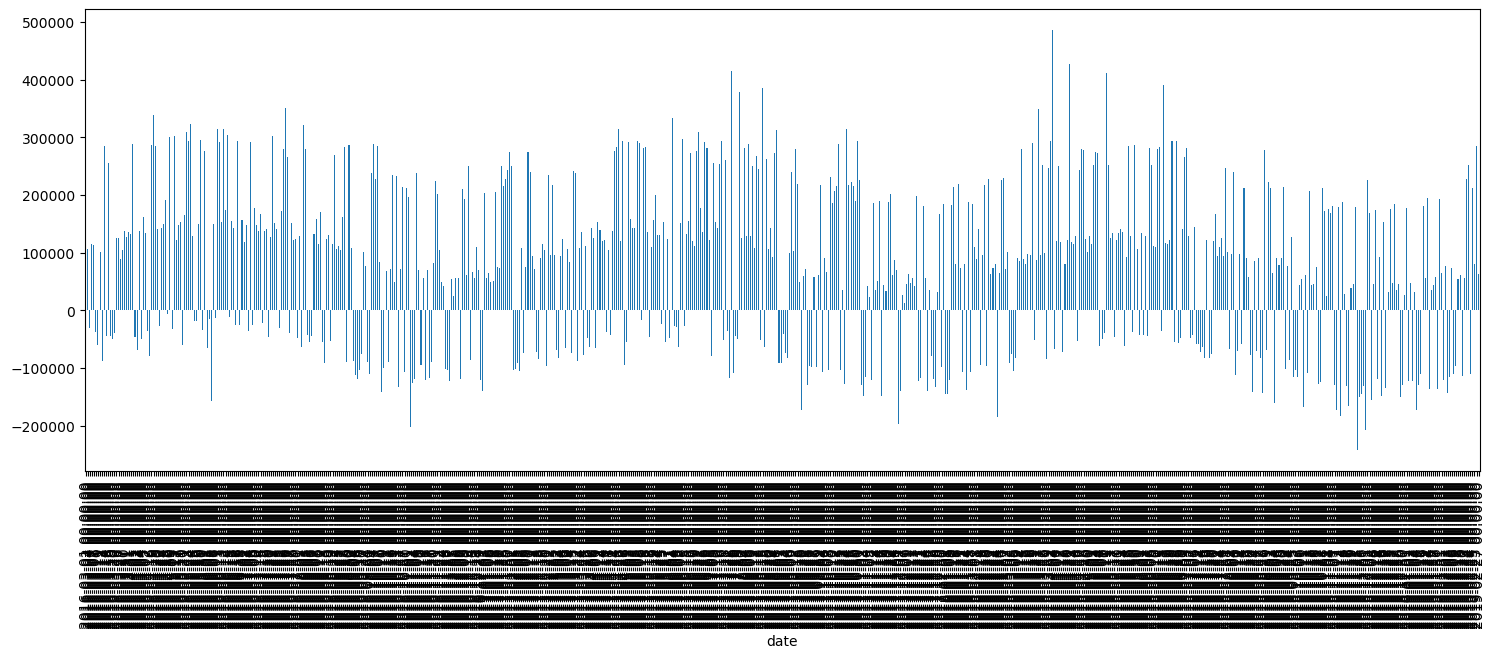

In [8]:
# Plotting the time series of given dataframe
plt.figure(figsize=(18, 6))
data_train.target.plot(kind = "bar")

# Numeric and categorical Variables

In [9]:
# Identify initial feature types
numeric_features = data_train.select_dtypes(include=np.number).columns.tolist()
print(f" Numeric Features: {numeric_features}")
categorical_features = data_train.select_dtypes(include=['object', 'category']).columns.tolist()
print(f" Categorical Features: {categorical_features}")

 Numeric Features: ['bar', 'baz', 'xgt', 'qgg', 'lux', 'wsg', 'yyz', 'drt', 'gox', 'foo', 'boz', 'fyt', 'lgh', 'hrt', 'juu', 'target', 'date_year', 'date_day']
 Categorical Features: ['image_class', 'date_month', 'date_dayofweek']


In [10]:
# Correlatio with target variable, there is no clear linear relationship with the target variable
corr_y = data_train[numeric_features].corr('pearson')['target']
corr_y

bar          0.058495
baz          0.008524
xgt          0.059559
qgg         -0.015258
lux          0.033065
wsg         -0.000386
yyz         -0.014862
drt          0.001962
gox         -0.011707
foo         -0.011086
boz          0.033299
fyt         -0.011562
lgh         -0.039907
hrt         -0.036169
juu         -0.005196
target       1.000000
date_year   -0.089509
date_day     0.108495
Name: target, dtype: float64

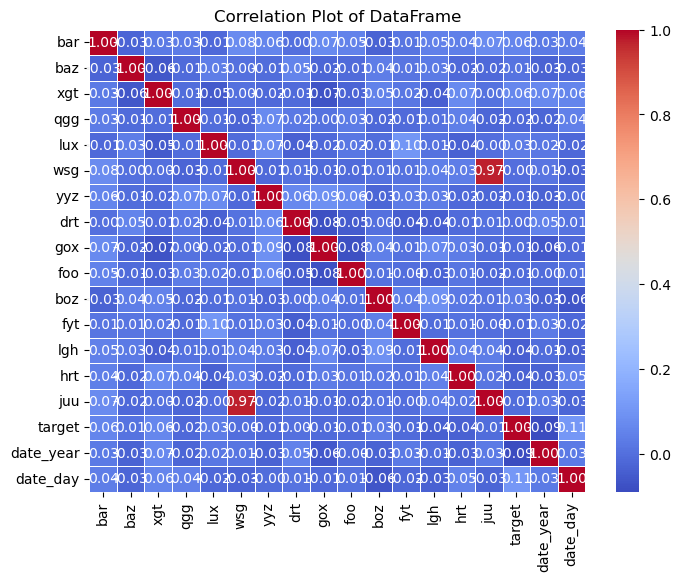

In [11]:
# Search for multicolinearity within the features
corr_matrix = data_train[numeric_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot of DataFrame')
plt.show()   


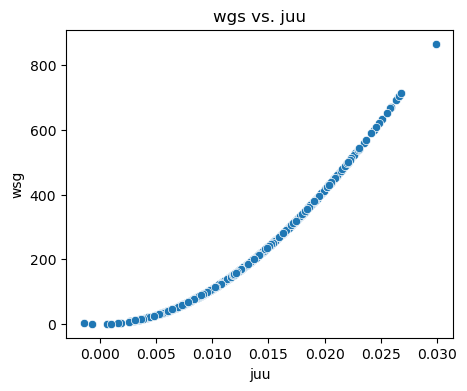

In [12]:
# Plot Variables with high correlation
plt.figure(figsize=(5, 4))
sns.scatterplot(x='wsg', y='juu', data=data_train)
plt.ylabel('wsg')
plt.xlabel('juu')
plt.title('wgs vs. juu')
plt.show()

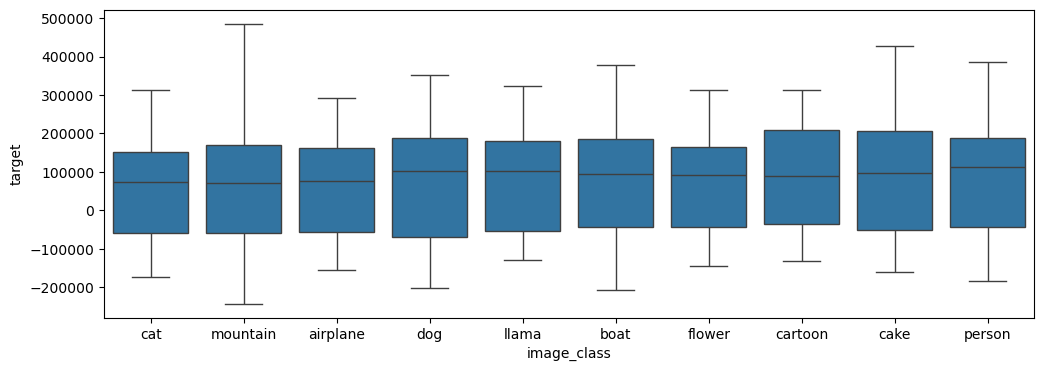

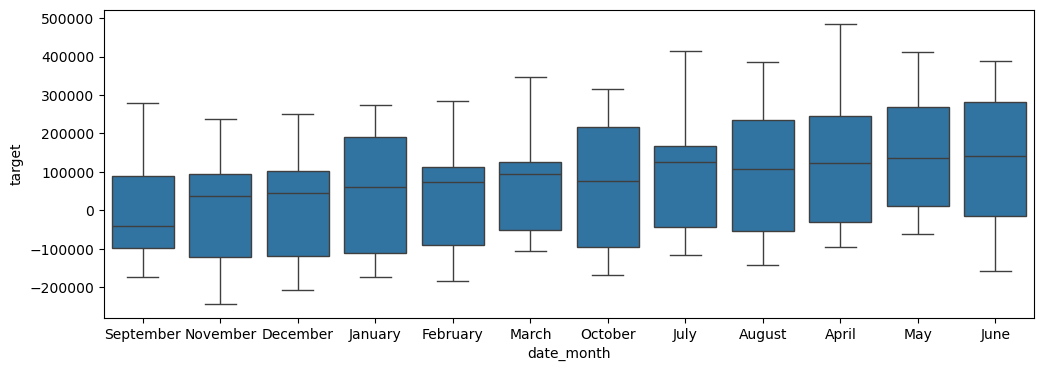

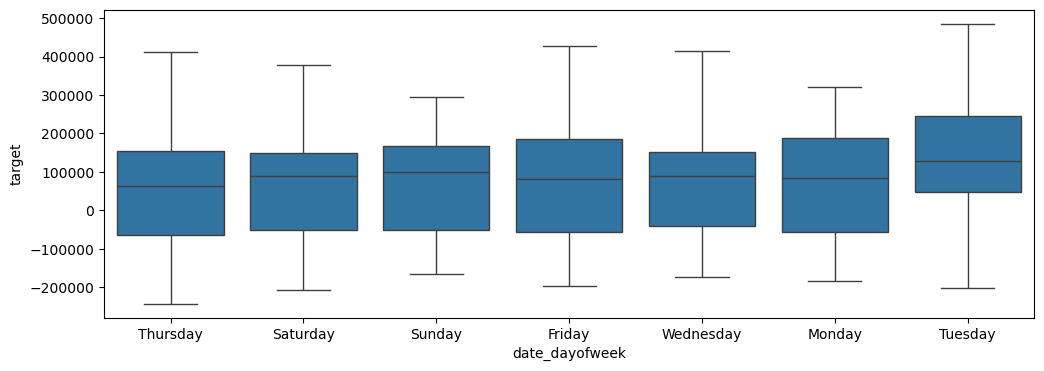

In [13]:
for var in categorical_features:
    plt.figure(figsize=(12, 4))
    # Calculate the mean of 'target' for each category in 'var'
    mean_order = data_train.groupby(var)['target'].mean().sort_values().index
    sns.boxplot(x=var, y='target', data=data_train, order=mean_order)
    plt.show()


In [14]:
# Remove redundant variable with high correlation
data_train.drop('juu', axis=1, inplace= True)

In [15]:
# Preprocessing
y= data_train['target']  # Target variable
X= data_train.drop('target', axis=1)

# Keep numeric and categorical features after filtering
numeric_features_keep = X.select_dtypes(include=np.number).columns.tolist()
categorical_features_keep = X.select_dtypes(include=['object', 'category']).columns.tolist()


# Split data into training and testing sets (important for preventing data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse=False for dense array

# Initialize scaler
scaler = StandardScaler()


# Fit the encoder on the training data's categorical columns
encoder.fit(X_train[categorical_features_keep])

# Transform the categorical columns in both training and testing sets
X_train_encoded = encoder.transform(X_train[categorical_features_keep])
X_test_encoded = encoder.transform(X_test[categorical_features_keep])

# Get the feature names (categories) generated by the encoder
feature_names = encoder.get_feature_names_out(categorical_features_keep)

# Create new DataFrames with the encoded features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test.index)

# Drop the original categorical columns and concatenate the encoded ones
X_train_processed = pd.concat([X_train.drop(categorical_features_keep, axis=1), X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test.drop(categorical_features_keep, axis=1), X_test_encoded_df], axis=1)

# Scale Variables
X_train_processed[numeric_features_keep]= scaler.fit_transform(X_train_processed[numeric_features_keep])
X_test_processed[numeric_features_keep]= scaler.fit_transform(X_test_processed[numeric_features_keep])




In [16]:
#Verify Standard dataset
print(X_train_processed.describe())

                bar           baz           xgt           qgg           lux  \
count  5.420000e+02  5.420000e+02  5.420000e+02  5.420000e+02  5.420000e+02   
mean   3.277411e-18  6.718693e-17 -1.966447e-17 -6.554822e-18  2.785799e-16   
std    1.000924e+00  1.000924e+00  1.000924e+00  1.000924e+00  1.000924e+00   
min   -8.484809e-01 -9.780995e-01 -3.672448e+00 -2.544563e+00 -2.546621e+00   
25%   -5.849944e-01 -9.780995e-01 -6.751735e-01 -5.015915e-01 -7.746148e-01   
50%   -5.302252e-01 -9.780995e-01  8.984494e-03 -5.812475e-03 -6.125223e-02   
75%    2.280036e-01  1.022391e+00  6.769289e-01  4.851526e-01  7.774694e-01   
max    3.149256e+00  1.022391e+00  3.224296e+00  2.375712e+00  1.762616e+00   

                wsg           yyz           drt           gox           foo  \
count  5.420000e+02  5.420000e+02  5.420000e+02  5.420000e+02  5.420000e+02   
mean   9.832233e-17  1.638706e-18  1.310964e-17 -2.294188e-17 -1.671480e-16   
std    1.000924e+00  1.000924e+00  1.000924e+00  1.

In [17]:
y_train.head(5)

date
2018-01-25   -107321.786373
2017-04-07    152453.664126
2017-02-13    -83624.066929
2016-03-27    104865.414656
2017-03-26    -47181.674923
Name: target, dtype: float64

In [18]:
# Define the models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Adaboosting Regressor': AdaBoostRegressor(random_state=42),
    'Bagging Regressor': BaggingRegressor(random_state=42),
}

# Perform Five Folds cross-validation for each model
cv_results = {}
for name, model in models.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    # Cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Consistent CV
    cv_scores_rmse = cross_val_score(model,  X_train_processed, y_train, cv=cv, scoring='neg_mean_squared_error')
    cv_rmse = np.mean(np.sqrt(-cv_scores_rmse))   # Convert negative MSE to positive RMSE
    cv_scores_r2 = cross_val_score(model,  X_train_processed, y_train, cv=cv, scoring='r2')
    cv_r2 = cv_scores_r2.mean()
    cv_results[name] = {'MeanCV_RMSE': cv_rmse, 'MeanCV_R2': cv_r2}

# Identify the model with the lowest mean RMSE
best_model_name_cv = min(cv_results, key=lambda k: cv_results[k]['MeanCV_RMSE'])
best_model_results = cv_results[best_model_name_cv]

print("Cross-Validation Results:")
for name, res in cv_results.items():
    print(f"{name}: MeanCV_RMSE = {res['MeanCV_RMSE']:.4f}, MeanCV_R2 = {res['MeanCV_R2']:.4f}")

print(f"\nThe model with the lowest average RMSE during cross-validation is: {best_model_name_cv}")
print(f"CV Mean RMSE: {best_model_results['MeanCV_RMSE']:.4f}, MeanCV_R2: {best_model_results['MeanCV_R2']:.4f}")



Cross-Validation Results:
Linear Regression: MeanCV_RMSE = 140792.3498, MeanCV_R2 = -0.0031
Random Forest Regressor: MeanCV_RMSE = 41468.9585, MeanCV_R2 = 0.9117
Gradient Boosting Regressor: MeanCV_RMSE = 44461.7849, MeanCV_R2 = 0.8991
Adaboosting Regressor: MeanCV_RMSE = 54786.6125, MeanCV_R2 = 0.8466
Bagging Regressor: MeanCV_RMSE = 45057.8725, MeanCV_R2 = 0.8961

The model with the lowest average RMSE during cross-validation is: Random Forest Regressor
CV Mean RMSE: 41468.9585, MeanCV_R2: 0.9117


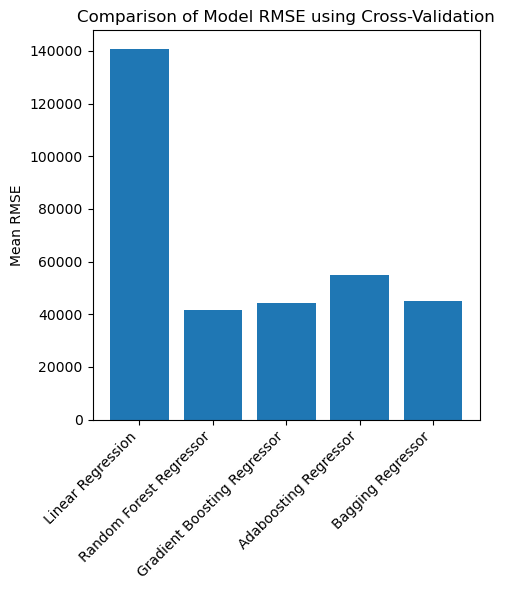

In [19]:
# Visualize the results
plt.figure(figsize=(5, 6))
model_names = list(cv_results.keys())
mean_rmse_scores = [res['MeanCV_RMSE'] for res in cv_results.values()]
plt.bar(model_names, mean_rmse_scores)
plt.ylabel('Mean RMSE')
plt.title('Comparison of Model RMSE using Cross-Validation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


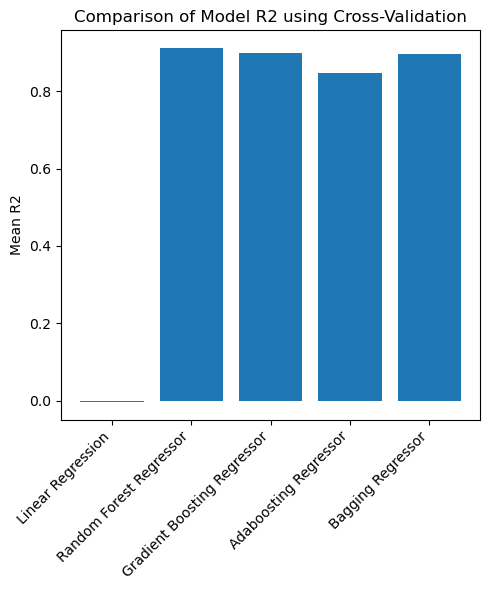

In [20]:
# Visualize the results
plt.figure(figsize=(5, 6))
model_names = list(cv_results.keys())
mean_r2_scores = [res['MeanCV_R2'] for res in cv_results.values()]
plt.bar(model_names, mean_r2_scores)
plt.ylabel('Mean R2')
plt.title('Comparison of Model R2 using Cross-Validation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
# Get the best model from Cross Validarion and use it on the testing set
best_model = models[best_model_name_cv]
best_model.fit(X_test_processed, y_test)

# Evaluate the best model on the train set
y_pred_bestmodel = best_model.predict(X_test_processed)
rmse_bestmodel = root_mean_squared_error(y_test, y_pred_bestmodel)
r2_bestmodel =r2_score(y_test, y_pred_bestmodel)
errors_bestmodel = y_test - y_pred_bestmodel
errors_standard = StandardScaler().fit_transform(errors_bestmodel.values.reshape(-1, 1))

print(f"\nRMSE of the best model with  ({best_model_name_cv}) on the testing set: {rmse_bestmodel:.4f}")
print(f"\nR2 of the best model with  ({best_model_name_cv}) on the testing set: {r2_bestmodel:.4f}")


RMSE of the best model with  (Random Forest Regressor) on the testing set: 29431.7791

R2 of the best model with  (Random Forest Regressor) on the testing set: 0.9525


In [22]:
print(best_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


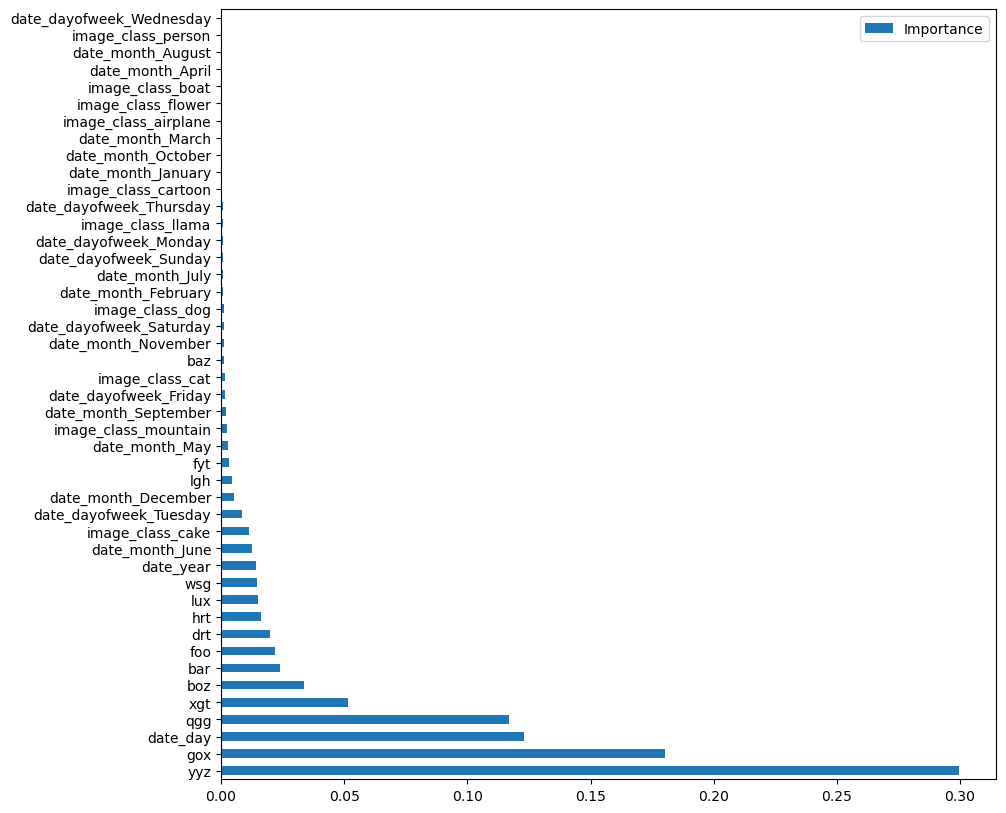

In [23]:
# Feature Importance in Random Forest
sorted_indices = np.argsort(best_model.feature_importances_)[::-1]
sorted_features = X_test_processed.columns.values[sorted_indices]
sorted_importances = best_model.feature_importances_[sorted_indices]
sorted_importances_df = pd.DataFrame(sorted_importances, index=sorted_features, columns=['Importance'])
sorted_importances_df.plot(kind='barh', figsize=(10, 10))
plt.show()

In [24]:
# Make future Selection

print("Original Training Data Shape:", X_train_processed.shape)

#  Get feature importances
feature_importances = pd.Series(best_model.feature_importances_, index=X_train_processed.columns)

#  Set a threshold for feature importance
importance_threshold = 0.015  # Adjust this threshold as needed

# Select important features
important_features = feature_importances[feature_importances >= importance_threshold].index.tolist()

# Create a new DataFrame with only the important features
X_train_selected = X_train_processed[important_features]
X_test_selected =  X_test_processed[important_features]

# Define the prefix of columns to drop
prefix_to_drop = 'unimportant_'  # Replace with your desired prefix

# Drop columns with the specified prefix from the selected features
columns_to_drop = [col for col in X_train_selected.columns if col.startswith(prefix_to_drop) or col.startswith('image_')]

X_train_final = X_train_selected.drop(columns=columns_to_drop)
X_test_final = X_test_selected.drop(columns=columns_to_drop)

print("Selected Important Features:", X_train_final.columns.to_list())
print("Shape of Training Data with Important Features:", X_train_final.shape)
print("Shape of Testing Data with Important Features:", X_test_final.shape)


Original Training Data Shape: (542, 45)
Selected Important Features: ['bar', 'xgt', 'qgg', 'yyz', 'drt', 'gox', 'foo', 'boz', 'hrt', 'date_day']
Shape of Training Data with Important Features: (542, 10)
Shape of Testing Data with Important Features: (136, 10)


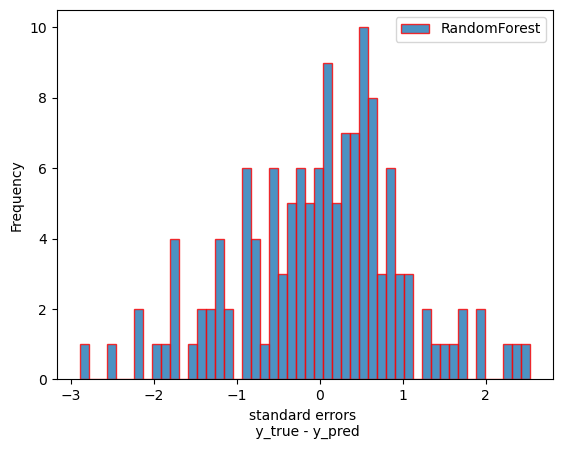

In [25]:
# Ploting Standard Errors errors_bestmodel = y_test - y_pred_bestmodel
plt.hist(errors_standard, label='RandomForest', alpha=.8, edgecolor='red', bins=50)
plt.xlabel ("standard errors \n y_true - y_pred")
plt.ylabel ("Frequency")
plt.legend()
plt.show()

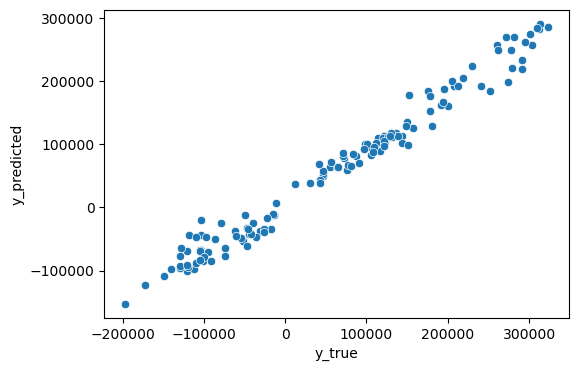

In [26]:
#Plot Y real vs Y predicted with Random Forest
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_bestmodel)
plt.xlabel ("y_true")
plt.ylabel ("y_predicted")
plt.show()

In [27]:
# Train model  with Selected Features
# Define the models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Adaboosting Regressor': AdaBoostRegressor(random_state=42),
    'Bagging Regressor': BaggingRegressor(random_state=42),
}

# Perform Five Folds cross-validation for each model
cv_results = {}
for name, model in models.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    # Cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Consistent CV
    cv_scores_rmse = cross_val_score(model,  X_train_final, y_train, cv=cv, scoring='neg_mean_squared_error')
    cv_rmse = np.mean(np.sqrt(-cv_scores_rmse))   # Convert negative MSE to positive RMSE
    cv_scores_r2 = cross_val_score(model,  X_train_final, y_train, cv=cv, scoring='r2')
    cv_r2 = cv_scores_r2.mean()
    cv_results[name] = {'MeanCV_RMSE': cv_rmse, 'MeanCV_R2': cv_r2}

# Identify the model with the lowest mean RMSE
best_model_name_cv = min(cv_results, key=lambda k: cv_results[k]['MeanCV_RMSE'])
best_model_results = cv_results[best_model_name_cv]

print("Cross-Validation Results:")
for name, res in cv_results.items():
    print(f"{name}: MeanCV_RMSE = {res['MeanCV_RMSE']:.4f}, MeanCV_R2 = {res['MeanCV_R2']:.4f}")

print(f"\nThe model with the lowest average RMSE during cross-validation is: {best_model_name_cv}")
print(f"CV Mean RMSE: {best_model_results['MeanCV_RMSE']:.4f}, MeanCV_R2: {best_model_results['MeanCV_R2']:.4f}")

Cross-Validation Results:
Linear Regression: MeanCV_RMSE = 142910.8889, MeanCV_R2 = -0.0336
Random Forest Regressor: MeanCV_RMSE = 48668.1632, MeanCV_R2 = 0.8786
Gradient Boosting Regressor: MeanCV_RMSE = 54400.0943, MeanCV_R2 = 0.8490
Adaboosting Regressor: MeanCV_RMSE = 54148.2978, MeanCV_R2 = 0.8517
Bagging Regressor: MeanCV_RMSE = 52191.1017, MeanCV_R2 = 0.8603

The model with the lowest average RMSE during cross-validation is: Random Forest Regressor
CV Mean RMSE: 48668.1632, MeanCV_R2: 0.8786


In [28]:
# Get the best model from Cross Validarion and use it on the testing set
best_model = models[best_model_name_cv]
best_model.fit(X_test_final, y_test)

# Evaluate the best model on the train set
y_pred_bestmodel = best_model.predict(X_test_final)
rmse_bestmodel = root_mean_squared_error(y_test, y_pred_bestmodel)
r2_bestmodel =r2_score(y_test, y_pred_bestmodel)
errors_bestmodel = y_test - y_pred_bestmodel
errors_standard = StandardScaler().fit_transform(errors_bestmodel.values.reshape(-1, 1))

print(f"\nRMSE of the best model with  ({best_model_name_cv}) on the testing set: {rmse_bestmodel:.4f}")
print(f"\nR2 of the best model with  ({best_model_name_cv}) on the testing set: {r2_bestmodel:.4f}")


RMSE of the best model with  (Random Forest Regressor) on the testing set: 28592.1324

R2 of the best model with  (Random Forest Regressor) on the testing set: 0.9552


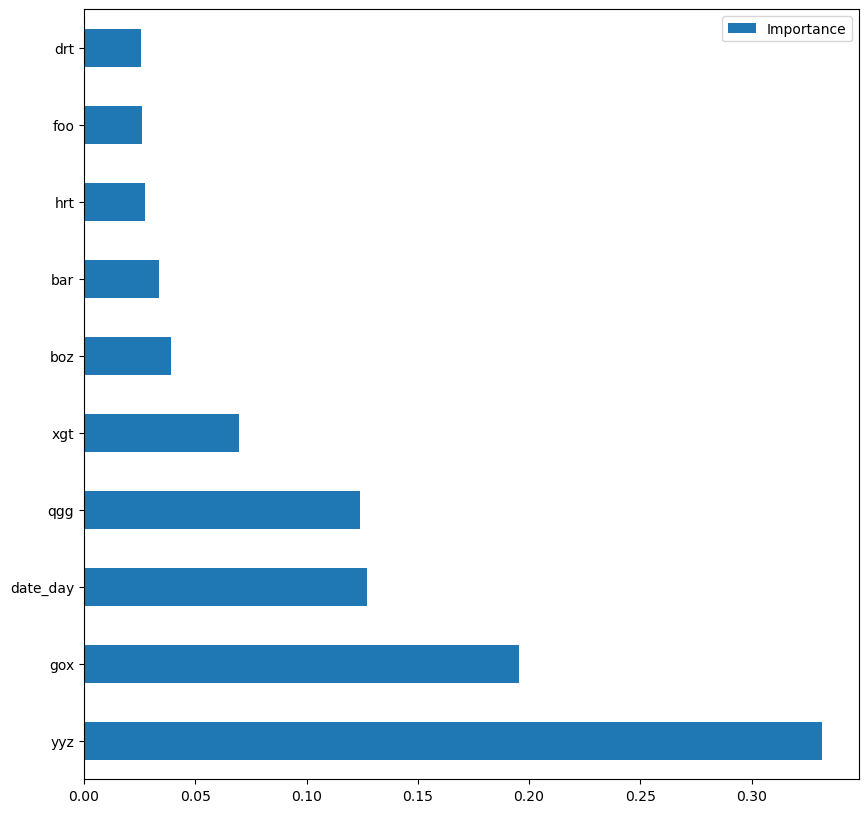

In [29]:
# Feature Importance in Random Forest
sorted_indices = np.argsort(best_model.feature_importances_)[::-1]
sorted_features = X_train_final.columns.values[sorted_indices]
sorted_importances = best_model.feature_importances_[sorted_indices]
sorted_importances_df = pd.DataFrame(sorted_importances, index=sorted_features, columns=['Importance'])
sorted_importances_df.plot(kind='barh', figsize=(10, 10))
plt.show()

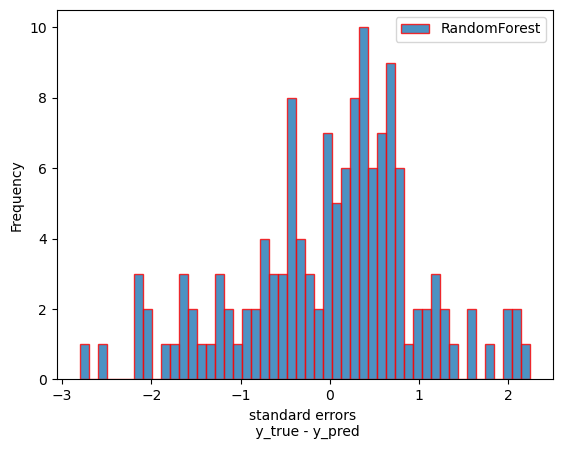

In [30]:
# Ploting Standard Errors errors_bestmodel = y_test - y_pred_bestmodel
plt.hist(errors_standard, label='RandomForest', alpha=.8, edgecolor='red', bins=50)
plt.xlabel ("standard errors \n y_true - y_pred")
plt.ylabel ("Frequency")
plt.legend()
plt.show()

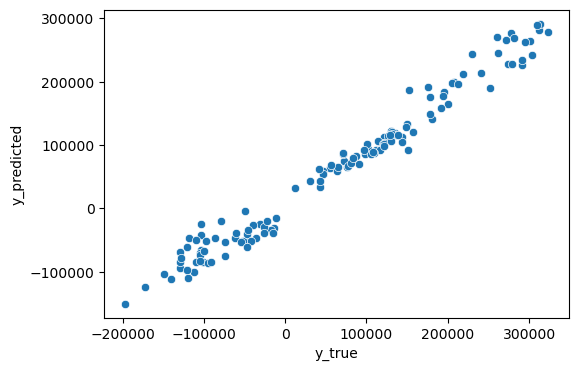

In [31]:
#Plot Y real vs Y predicted with Random Forest
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_bestmodel)
plt.xlabel ("y_true")
plt.ylabel ("y_predicted")
plt.show()

# Load Testing Data

In [32]:
#Load Training Data
file_test ='test.csv'
#Set index as date
data_test = pd.read_csv(file_test,parse_dates=['date'])
#Process column names
def clean_header(col):
    col = str(col).strip().replace(' ', '_')
    return col

data_test.columns = [clean_header(col) for col in data_test.columns]

In [33]:
# Process dates
data_test['date' + '_year'] = data_test['date'].dt.year
data_test['date' + '_month'] = data_test['date'].dt.month_name()
data_test['date' + '_day'] = data_test['date'].dt.day
data_test['date' + '_dayofweek'] = data_test['date'].dt.day_name()
# Set index by date and sort it
data_test = data_test.sort_values(by='date',ascending=True)
data_test = data_test.set_index("date")
data_test.head(5)

,image,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu,date_year,date_month,date_day,date_dayofweek
date,,,,,,,,,,,,,,,,,,,,
2018-03-13,test-img/galaxy/galaxy_10.jpg,0.010168,1,-321.918234,0.745860,6079.131413,0.011153,0.647039,-130.810723,0.215793,0.427012,0.793635,0,0,-288.148805,134.087266,2018,March,13,Tuesday
2018-03-21,test-img/galaxy/galaxy_9.jpg,947.013623,1,35.152583,12.220003,6313.115212,0.007829,8.096062,-53.528171,-23.115159,6.639362,0.094435,1,0,-123.788301,66.629577,2018,March,21,Wednesday
2018-05-15,test-img/cake/cake_41.jpg,343.647336,0,-120.823528,-2.324844,5224.352287,0.012493,1.766884,-5451.683971,-7.895307,23.945848,0.185305,1,0,-222.551460,167.537397,2018,May,15,Tuesday
2018-05-15,test-img/galaxy/galaxy_2.jpg,249.292705,1,184.279333,2.966202,5467.118682,0.013806,5.082280,-135.525215,6.046241,18.477131,13.406953,0,1,-440.054080,203.662536,2018,May,15,Tuesday
2018-05-20,test-img/ball/ball_8.jpg,276.492816,0,-363.400163,7.545298,5536.456346,0.010306,-1.928627,-47.127370,-3.679753,18.266090,1.062210,1,0,-358.509594,114.761972,2018,May,20,Sunday


In [34]:
features_for_model = X_train_final.columns.to_list()

In [35]:
# Preprocessing
X = data_test[features_for_model]
X.dtypes


bar         float64
xgt         float64
qgg         float64
yyz         float64
drt         float64
gox         float64
foo         float64
boz         float64
hrt         float64
date_day      int32
dtype: object

In [36]:
# Keep numeric and categorical features after filtering
numeric_features_keep = X.select_dtypes(include=np.number).columns.tolist()
categorical_features_keep = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features_keep

['bar', 'xgt', 'qgg', 'yyz', 'drt', 'gox', 'foo', 'boz', 'hrt', 'date_day']

In [37]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse=False for dense array

# Initialize scaler
scaler = StandardScaler()


# Fit the encoder on the training data's categorical columns
encoder.fit(X[categorical_features_keep])

# Transform the categorical columns in both training and testing sets
X_encoded = encoder.transform(X[categorical_features_keep])

# Get the feature names (categories) generated by the encoder
feature_names = encoder.get_feature_names_out(categorical_features_keep)

# Create new DataFrames with the encoded features
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names, index=X.index)


# Drop the original categorical columns and concatenate the encoded ones
X_processed = pd.concat([X.drop(categorical_features_keep, axis=1), X_encoded_df], axis=1)


# Scale Variables
X_processed[numeric_features_keep]= scaler.fit_transform(X_processed[numeric_features_keep])


In [38]:
X_processed.describe()

,bar,xgt,qgg,yyz,drt,gox,foo,boz,hrt,date_day
count,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02
mean,7.366900e-17,-1.206200e-17,-3.112775e-17,-6.225550e-18,1.400749e-17,2.905257e-17,3.112775e-16,1.037592e-17,2.381273e-16,8.715770e-17
std,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00
min,-8.139669e-01,-2.336345e+00,-2.472013e+00,-2.676283e+00,-6.689577e+00,-2.420868e+00,-2.696404e+00,-2.721634e-01,-2.693301e+00,-1.856083e+00
25%,-5.847117e-01,-7.559903e-01,-4.961241e-01,-4.651785e-01,2.190389e-01,-3.633085e-01,-6.131706e-01,-2.476029e-01,-5.991672e-01,-7.416658e-01
50%,-5.340725e-01,-4.867960e-02,-6.186129e-02,-1.205855e-02,2.641639e-01,6.905837e-02,-1.824449e-02,-2.193886e-01,9.140078e-03,2.083023e-02
75%,2.205833e-01,6.865811e-01,5.236801e-01,5.247213e-01,2.773514e-01,5.321683e-01,8.354735e-01,-1.205500e-01,6.575691e-01,8.419797e-01
max,3.186833e+00,2.411631e+00,2.322028e+00,2.459858e+00,2.793835e-01,2.239354e+00,2.326122e+00,7.131829e+00,2.572926e+00,1.663129e+00


In [39]:
# Evaluate the best model on the train set
y_pred_bestmodel = best_model.predict(X_processed)
y_pred_bestmodel


array([ 47203.0745366 ,  13059.25298687, -16533.87357708, -12155.49859414,
        -1308.52790384,  28977.55286121,  74586.13331889,  20132.17047295,
        93672.2243006 ,  99357.44522216, -21964.13891257,  55314.01406439,
        82100.92511803,  80210.03477301,  67819.46705984, 113233.0687475 ,
         4465.44768521,  14224.41000694,  72378.00234396, -13326.82487408,
       -34244.17656132, 104172.6839047 ,  -5947.8936742 ,  83960.24193924,
         1554.34032477,  90976.82707322, 126355.81297845, -48398.76408747,
        59364.67911066, -29346.78133364,   2627.46340938,  58659.40330447,
        66837.34526083,  81391.05724274,  27036.71198525,   2847.57002501,
        47345.32034162,  60799.30485162, -25030.81032679,  88126.24786994,
       -34110.39591946,  18135.82911945,  92255.37904377,  60379.88840754,
       -70340.07353062,  -4553.26220573,  87520.56160544,  89498.98925023,
        97887.68967801, -13371.6659942 ,  80278.29156641,  52540.22174132,
       112123.55983914, 1